## Prueba las funciones de activación Sigmoid, Tanh y ReLU en el conjunto de datos MNIST


<h2>Objetivo</h2><ul><li>Cómo aplicar diferentes funciones de activación en el conjunto de datos MNIST.</li></ul>


In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

import matplotlib.pylab as plt
import numpy as np

#### Módulo de Red Neuronal y Función de Entrenamiento


Define el módulo o la clase de la red neuronal usando la función de activación sigmoide:


In [2]:
# Build the model with sigmoid function

class Net(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return x

Define el módulo o la clase de la red neuronal usando la función de activación Tanh:


In [3]:
# Build the model with Tanh function

class NetTanh(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = self.linear2(x)
        return x

Define el módulo o la clase de la red neuronal usando la función de activación ReLU:


In [4]:
# Build the model with Relu function

class NetRelu(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

Define una función para entrenar el modelo. En este caso, la función devuelve un diccionario de Python para almacenar la pérdida de entrenamiento en cada iteración y la exactitud en los datos de validación.


In [5]:
# Define the function for training the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.item())

        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label=torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)

    return useful_stuff

### Genera unos datos

Carga el conjunto de datos de entrenamiento estableciendo el parámetro <code>train</code> en True y conviértelo en un tensor colocando un objeto de transformación en el argumento transform.


In [6]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Carga el conjunto de datos de prueba estableciendo el parámetro train en False y conviértelo en un tensor colocando un objeto de transformación en el argumento transform.


In [7]:
# Create the validation  dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Crea la función de criterio:


In [8]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Crea los objetos *data loader* para los datos de entrenamiento y de validación:


In [9]:
# Create the training data loader and validation data loader object

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

### Define la Red Neuronal, la Función de Criterio, el Optimizador y entrena el modelo


Crea la función de criterio:

In [10]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Crea el modelo con 100 neuronas ocultas

In [11]:
# Create the model object

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

### Prueba las funciones Sigmoid, Tanh y ReLU


Entrena la red usando la función de activación sigmoide:


In [12]:
# Train a model with sigmoid function

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

Entrena la red usando la función de activación Tanh:


In [13]:
# Train a model with Tanh function

model_Tanh = NetTanh(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=30)

Entrena la red usando la función de activación Relu:


In [14]:
# Train a model with Relu function

modelRelu = NetRelu(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=30)

### Analiza resultados

Compara la pérdida de entrenamiento para cada función de activación:


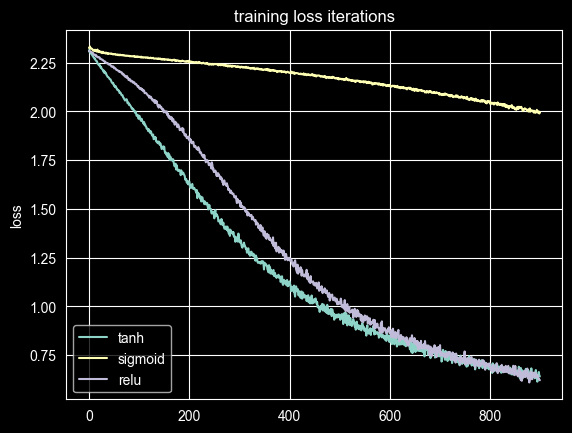

In [15]:
# Compare the training loss

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()

Compara la pérdida de validación para cada modelo:


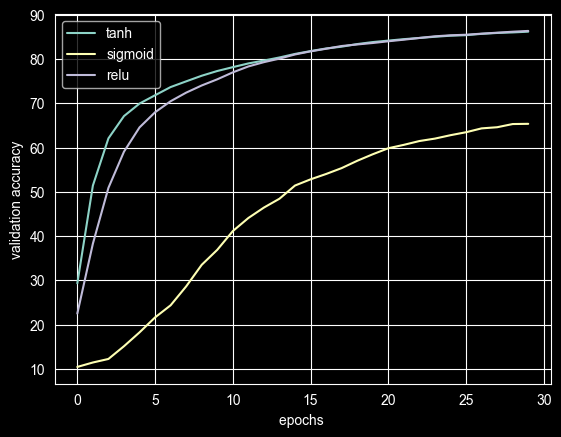

In [16]:
# Compare the validation loss

plt.plot(training_results_tanch['validation_accuracy'], label='tanh')
plt.plot(training_results['validation_accuracy'], label='sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label='relu')
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')
plt.legend()
plt.show()